In [34]:
# importing libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.utils.vis_utils import plot_model
from keras import regularizers

##Using DeepFace

###Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python.

In [2]:
#installing deep face 
!pip install deepface

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 2.3 MB 10.8 MB/s 
     |████████████████████████████████| 462 kB 51.5 MB/s 


In [3]:
#calling the dependencies
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt 

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#confirming the path of images
img1 = cv2.imread("/content/drive/MyDrive/almabetter Capstone projects/Face recognition/bb1.jpg")
img2 = cv2.imread("/content/drive/MyDrive/almabetter Capstone projects/Face recognition/bb2.jpg") 

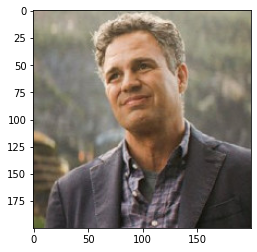

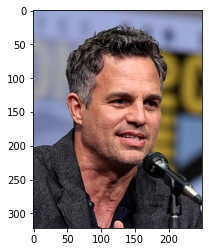

In [14]:
# plotting images 
plt.imshow(img1[:, :, :: -1]) #setting value as -1 to maintain saturation
plt.show()
plt.imshow(img2[:, :, ::-1 ]) 
plt.show() 

###It is a hybrid face recognition framework wrapping state-of-the-art models: VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace and Dlib. The library is mainly based on Keras and TensorFlow.

In [15]:
#calling VGGFace
model_name = "VGG-Face"
model = DeepFace.build_model(model_name)

In [16]:
#using verify function

#validate our images

result=DeepFace.verify("/content/drive/MyDrive/almabetter Capstone projects/Face recognition/bb1.jpg","/content/drive/MyDrive/almabetter Capstone projects/Face recognition/bb2.jpg")
#generating result of comparison 
DeepFace.verify(img1,img2)

{'detector_backend': 'opencv',
 'distance': 0.25321025117775153,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': True}

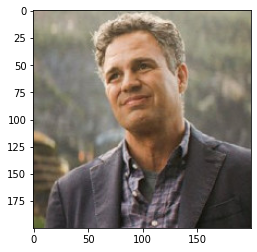

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 77.9MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:10<00:00, 51.1MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:06<00:00, 78.8MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:06<00:00, 81.4MB/s]
Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

32 years old white   happy   Man


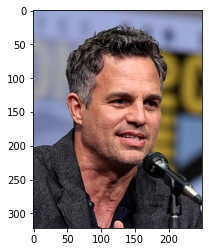

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]



33  years old  white   fear   Man


In [18]:
# setting values as  -1 to maintain saturation

plt.imshow(img1[:, :, ::-1])
plt.show()

#creating an object to analyze facial features

obj=DeepFace.analyze(img_path=img1,actions=["age","gender","race","emotion"])

print("=======================================================================")
 # checking age race ,emotion and gender using DEEPFACE for Img1

print(obj["age"],"years old",obj["dominant_race"]," ",obj["dominant_emotion"]," ",obj["gender"])


plt.imshow(img2[:, :, ::-1 ]) 
plt.show()
#creating an object to analyze facial features
obj = DeepFace.analyze(img_path = img2, actions = ['age', 'gender', 'race', 'emotion'])
print("\n")
 #checking age, race, emotion and gender using DEEPFACE for image 2
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])


In the first image emotion is correctly predicted by model which is happy but in second image the emotion is incorrectly predicted.it should be neutral
Let's verify model with more images

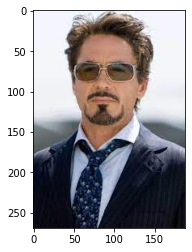

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]



43  years old  latino hispanic   fear   Man


In [19]:
 #setting path for different image
img3_path = "/content/drive/MyDrive/almabetter Capstone projects/Face recognition/tony.jfif" 
img3 = cv2.imread(img3_path)


 plt.imshow(img3[:, :, ::-1 ]) 
 plt.show()
 #creating an object to analyze facial features
 obj = DeepFace.analyze(img_path = img3, actions = ['age', 'gender', 'race', 'emotion'])
 print("\n")
 #checking age, race, emotion and gender using DEEPFACE for image 3
 print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

The emotion predicted by model is fear  which is incorrect , Let's try another approach for more accurate results

In [ ]:
 #comparing the faces in images using VGG Face
 DeepFace.verify(img1, img3) 

{'detector_backend': 'opencv',
 'distance': 0.733010053138675,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': False}

## Using Transfer Learning
##Transfer learning is the reuse of a pre-trained model on a new problem.
##In transfer learning, the knowledge of an already trained machine learning model is applied to a different but related problem.
## we basically try to exploit what has been learned in one task to improve generalization in another. We transfer the weights that a network has learned at "task A" to a new "task B."

##VGG16
###VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014.
###The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# tain dataset path
# path_train="/content/drive/MyDrive/almabetter Capstone projects/Face recognition/Images train test set/train"
path_train="/content/drive/MyDrive/almabetter Capstone projects/Face recognition/Train Test image set/train"

In [24]:
# test dataset path
# path_test="/content/drive/MyDrive/almabetter Capstone projects/Face recognition/Images train test set/test"
path_test="/content/drive/MyDrive/almabetter Capstone projects/Face recognition/Train Test image set/test"

(48, 48, 3)


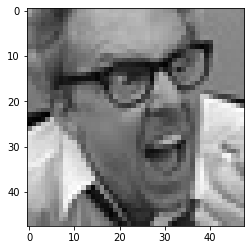

In [25]:
# plotting one of the image from train datset


from keras.preprocessing import image
img=image.load_img(path_train+"/angry/Training_3908.jpg",target_size=(48,48))
img=np.array(img)
plt.imshow(img)

# checking the shape of image

print(img.shape)

In [26]:
# counting no of images and emotions

import os

total_images=0
for dir_ in os.listdir(path_train):
  count=0
  for f in os.listdir(path_train+"/"+dir_ +"/"):
    count+=1
    total_images+=1
  print(f"{dir_} has {count} number of images" )
print(f"\n total images are {total_images}")

surprise has 3171 number of images
fear has 4097 number of images
happy has 7215 number of images
neutral has 4965 number of images
sad has 4830 number of images
disgust has 436 number of images
angry has 3995 number of images

 total images are 28709


###Implementing Vgg-16

In [27]:
# add preprocessing layer to the fron of VGG
vgg=VGG16(input_shape=(48,48,3),weights="imagenet",include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [28]:
# freezing the layer
for layer in vgg.layers:
  layer.trainable=False

In [29]:
# get no of classes

folders=glob(path_train+"/*")

In [30]:
# flatten vgg output and include output layer according to our use case
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation="softmax")(x)

In [31]:
# model creation

model=Model(inputs=vgg.input,outputs=prediction)

# model summary

In [32]:
# view the structure of the model
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

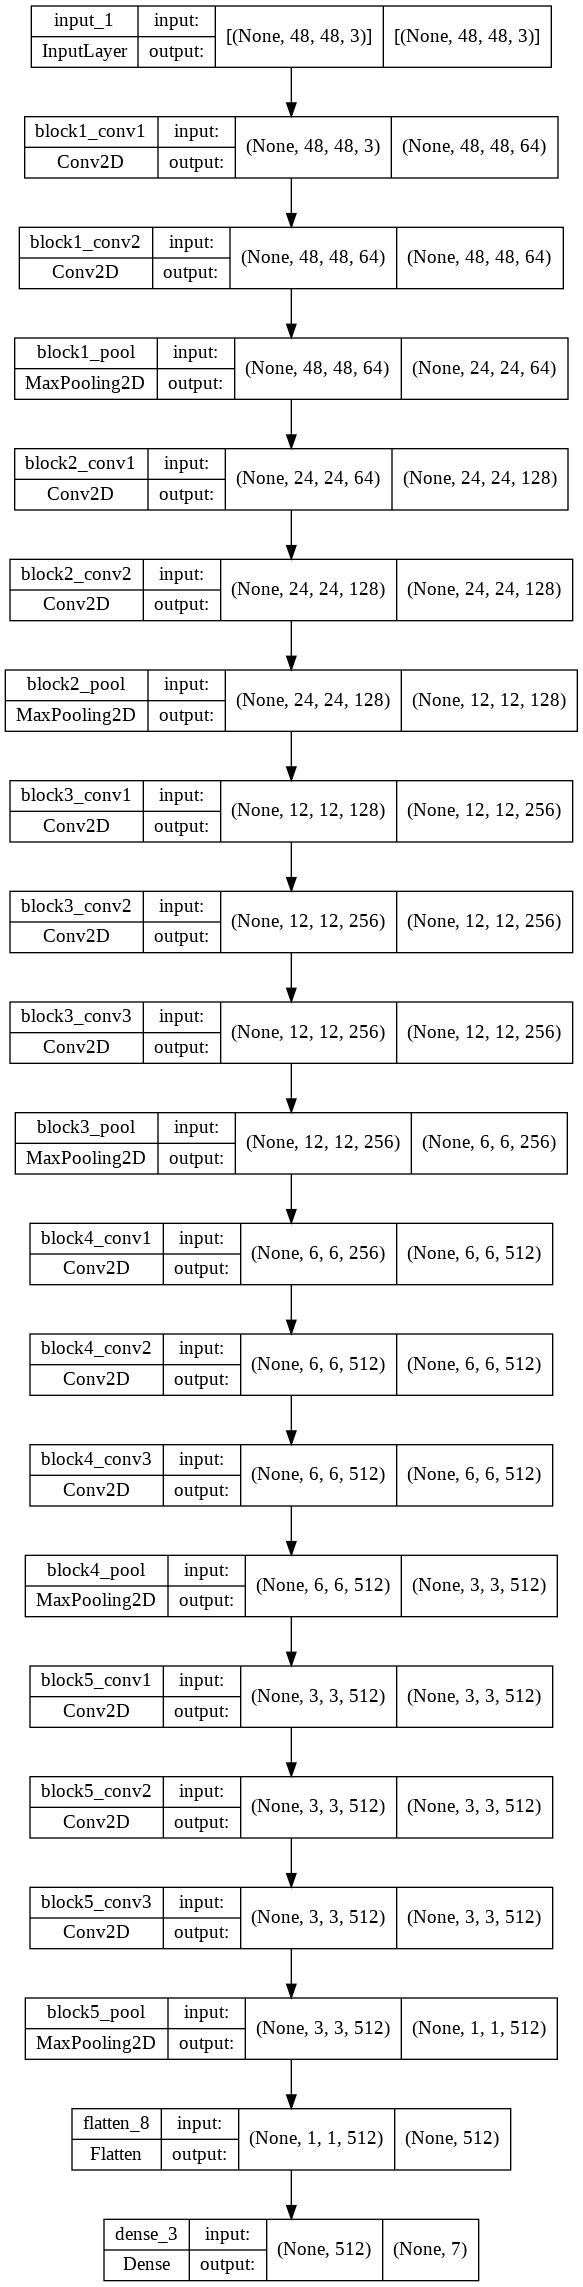

In [35]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# model compilation

In [36]:
# suggest the model what cost and optimization method to use
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [37]:
# data agumentation for training images
train_data_agumentation_images=ImageDataGenerator(rescale=1./255,
                                                 validation_split=0.2,
                                                 rotation_range=5,
                                                 width_shift_range=0.2,
                                                 height_shift_range=0.2,
                                                 shear_range=0.2,
                                                 #zoom_Range=0.2,
                                                 horizontal_flip=True,
                                                 vertical_flip=True,
                                                 fill_mode="nearest")
# agumenting test images
test_data_agumentattion_images=ImageDataGenerator(rescale=1./255)

#genrate training ste

training_set=train_data_agumentation_images.flow_from_directory(path_train,target_size=(48,48),
                                                                batch_size=64,
                                                                class_mode="categorical",
                                                            )
# genrate test data
test_set=test_data_agumentattion_images.flow_from_directory(path_test,target_size=(48,48),
                                                            batch_size=64,
                                                            class_mode="categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# skip the cells from running
%%script echo skipping

# model fitting
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    verbose=1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
443/443 [==============================] - 6633s 15s/step - loss: 1.7336 - accuracy: 0.3002 - val_loss: 1.6794 - val_accuracy: 0.3275
Epoch 2/5
443/443 [==============================] - 123s 277ms/step - loss: 1.6779 - accuracy: 0.3314 - val_loss: 1.6438 - val_accuracy: 0.3505
Epoch 3/5
443/443 [==============================] - 122s 276ms/step - loss: 1.6567 - accuracy: 0.3440 - val_loss: 1.6395 - val_accuracy: 0.3580
Epoch 4/5
443/443 [==============================] - 122s 276ms/step - loss: 1.6467 - accuracy: 0.3507 - val_loss: 1.6167 - val_accuracy: 0.3638
Epoch 5/5
443/443 [==============================] - 122s 276ms/step - loss: 1.6393 - accuracy: 0.3550 - val_loss: 1.6134 - val_accuracy: 0.3651


# model evaluation

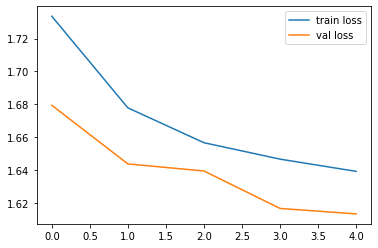

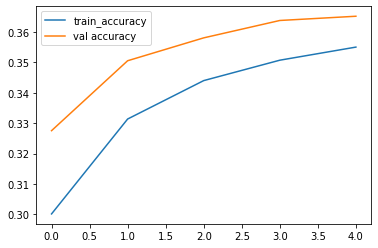

AttributeError: ignored

In [ ]:
# visualization of model performance
# loss
plt.plot(r.history["loss"],label="train loss")
plt.plot(r.history["val_loss"],label="val loss")
plt.legend()
plt.show()
#
# plt.savefig("lossval_loss")

# accuracies

plt.plot(r.history["accuracy"],label="train_accuracy")
plt.plot(r.history["val_accuracy"],label="val accuracy")
plt.legend()
plt.show()

# plt.savfig("accval_acc")

In [ ]:
#saving the model
model.save('trial_model_VGG16.h5')

##ResNet50 Model

###ResNet-50 is a convolutional neural network that is 50 layers deep.It is  build on constructs known from pyramidal cells in the cerebral cortex. Residual neural networks do this by utilizing skip connections, or shortcuts to jump over some layers. The network has an image input size of 224x224. 

In [38]:
#Augumenting train images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

#Augumenting validation images

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

#Augumenting test images
test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )


In [39]:
# generate train set
train_dataset  = train_datagen.flow_from_directory(path_train,
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

# generate validation set
valid_dataset = valid_datagen.flow_from_directory(path_train,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

# generate test set
test_dataset = test_datagen.flow_from_directory(path_test,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


###Implementing ResNet-50

In [40]:
# add preprocessing layer
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

94781440/94765736 [==============================] - 2s 0us/step


In [41]:
# Freezing Layers

for layer in base_model.layers[:-4]:
    layer.trainable=False

### Customizing last 4 layers of ResNet according to our use case

In [42]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

## model summary

In [43]:
# Model Summary

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_10 (Dropout)        (None, 2, 2, 2048)        0         
                                                                 
 flatten_9 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 32)                262176    
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

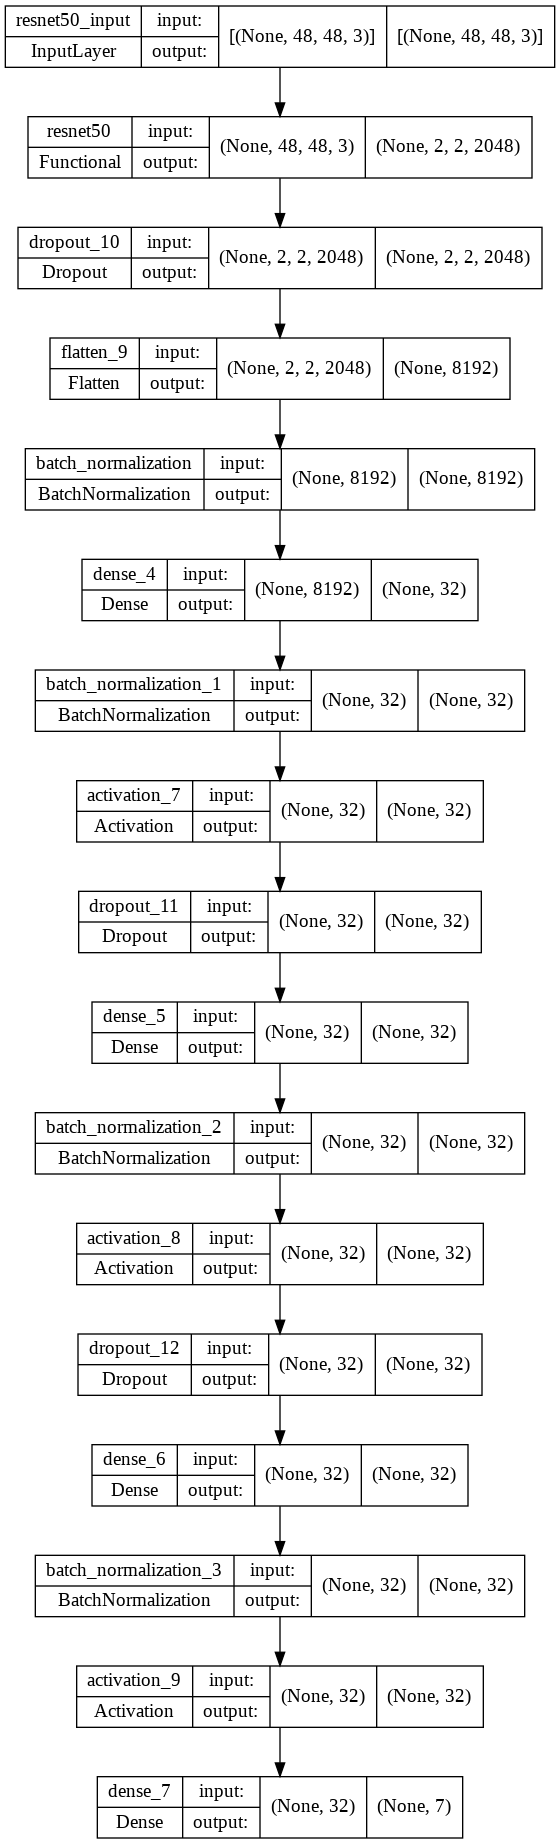

In [44]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [45]:
#  evaluation metrics
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]

In [46]:
#Using callbacks and `early stopping` for avoiding overfitting of training data and `ReduceLROnPlateau` for learning rate.

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

# model compliation of resnet-50

In [47]:
# compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

# model fitting to data

In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 20,verbose = 1,callbacks=[lrd,mcp,es])

In [ ]:
#saving the model
model.save('final_model_ResNet50.h5')

## model evaluation

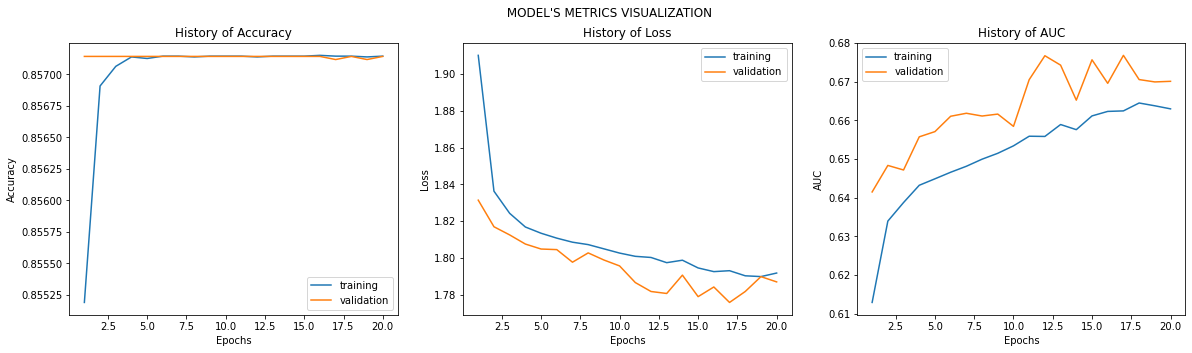

In [ ]:
# created a function to visualize model evaluation metrics
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc):
    
    fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")
    
    #Accuracy
    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])

    #Loss
    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    # AUC
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    plt.show()
    
#Plot all the metrics plot
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc']
              )

##Inference

###  The training and validation accuracy is 85.71% and training & validation loss also decreased below 1.80

####After verifying from live video this model doesn't seem to work very well in recognizing face emotions. Most of the time it predicted happy face although it was some other expression!!
####Hence i have created a custom CNN model

##Building our own Custom CNN Model


In [48]:
image_size= 48
batch_size= 64
#Augumenting train images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

#generate train set
training_set = train_datagen.flow_from_directory(path_train,
                                                batch_size=64,
                                                target_size=(image_size, image_size),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')
#Augumenting test images
test_datagen = ImageDataGenerator(rescale=1./255)
#generate test set
test_set = test_datagen.flow_from_directory(path_test,
                                                batch_size=64,
                                                target_size=(image_size, image_size),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [49]:
#defining function to create custom CNN model
def model_2(input_size, classes=7):
    model= tf.keras.models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
    model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    

    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #Faltten the model
    model.add(Flatten())
    
    
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(classes, activation='softmax'))
    opt = Adam(lr=0.0001 , decay=1e-6)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary
    return model

In [50]:
#model summary
row, col = 48, 48
classes = 7
model_2 = model_2((row,col,1), classes)
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_70 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_10 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 24, 24, 64)       

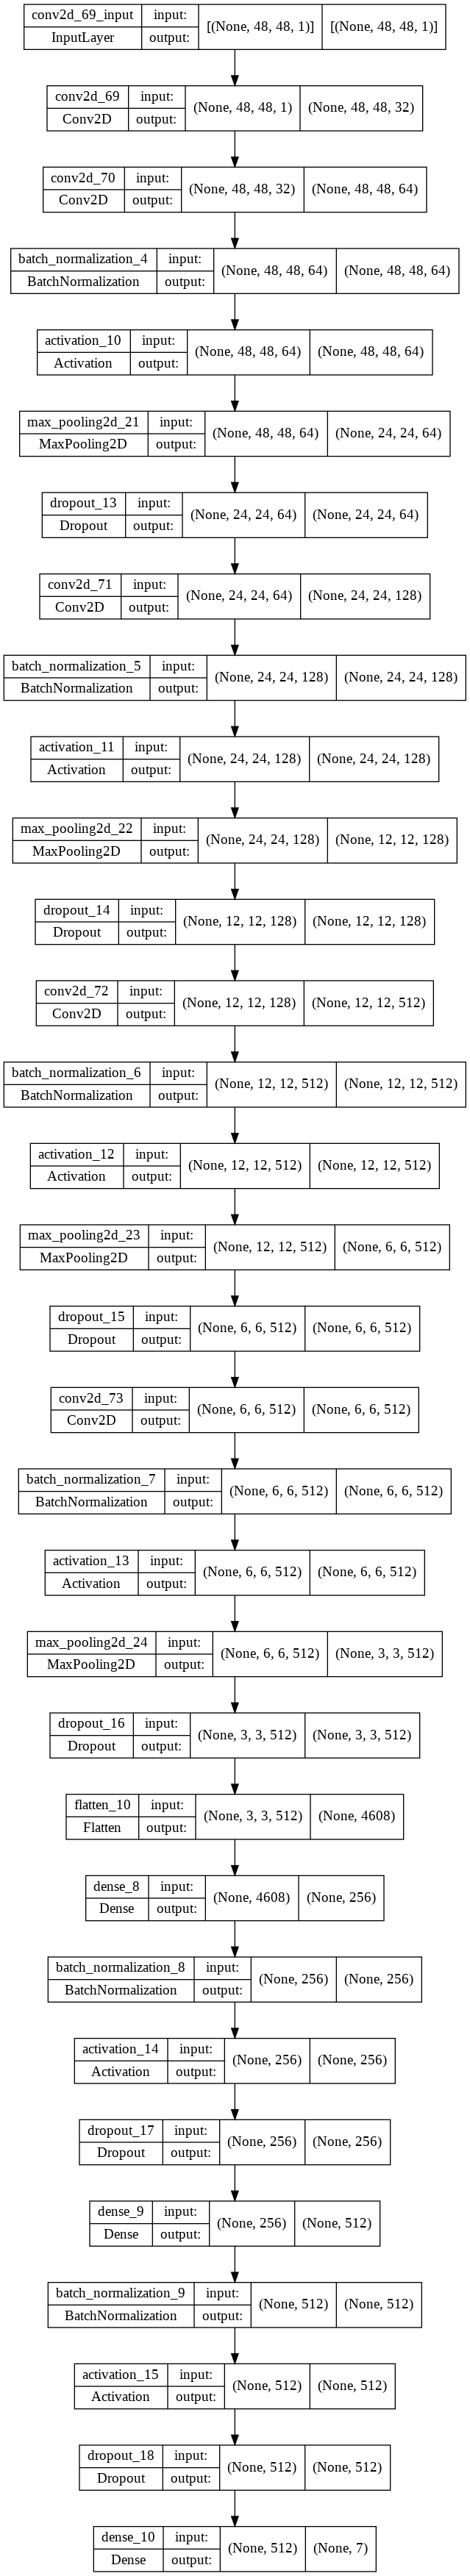

In [53]:
plot_model(model_2, to_file='model.png', show_shapes=True, show_layer_names=True)

In [51]:
import datetime
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#Using callbacks and `early stopping` for avoiding overfitting of training data and `ReduceLROnPlateau` for learning rate
checkpoint = ModelCheckpoint(filepath="'model.h5'",
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks_list = [checkpoint, reduce_lr, csv_logger]

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

# fit the model
model_2_hist = model_2.fit(x=training_set,
                 validation_data=test_set,
                 epochs=50,
                 callbacks=callbacks_list,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/50
448/448 [==============================] - ETA: 0s - loss: 8.4790 - accuracy: 0.2231 
Epoch 00001: val_loss improved from inf to 7.64356, saving model to 'model.h5'
INFO:tensorflow:Assets written to: 'model.h5'/assets
448/448 [==============================] - 6848s 15s/step - loss: 8.4790 - accuracy: 0.2231 - val_loss: 7.6436 - val_accuracy: 0.1749 - lr: 1.0000e-04
Epoch 2/50
448/448 [==============================] - ETA: 0s - loss: 6.8460 - accuracy: 0.2612
Epoch 00002: val_loss improved from 7.64356 to 6.07254, saving model to 'model.h5'
INFO:tensorflow:Assets written to: 'model.h5'/assets
448/448 [==============================] - 88s 195ms/step - loss: 6.8460 - accuracy: 0.2612 - val_loss: 6.0725 - val_accuracy: 0.2863 - lr: 1.0000e-04
Epoch 3/50
448/448 [==============================] - ETA: 0s - loss: 5.4455 - accuracy: 0.2907
Epoch 00003: val_loss improved from 6.07254 to 4.81828, saving model to 'model.h5'
INFO:tensorflow:Assets written to: 'model.h5'/assets
448/4

In [ ]:
#save the model
model_2.save('Final_model_CNN.h5')

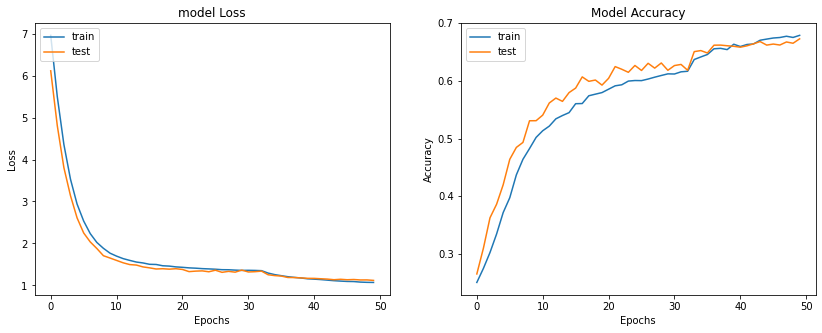

In [ ]:
# visualization metrics plot
# accuracy
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(model_2_hist.history['accuracy'])
plt.plot(model_2_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

#Loss
plt.subplot(1,2,1)
plt.plot(model_2_hist.history['loss'])
plt.plot(model_2_hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# conclusion:


###The training gave accuracy of 66.64% and validation accuracy is 66.10%, which is pretty good. Hence i have used this model for final Face Emotion Recognition.
###Since validation accuracy is slightly less than training accuracy, hence there is no overfitting in our model.
###After verifying from live video , it gave good results.
###One drawback of this system is that some Disgust faces are not predicted correctly most of the time, Because there are less no. of disgust faces are given to train.
###There are some mislabeled data in the dataset. Hence the accuracy is little bit on a lower end(not above 70%)

### we have tried 5 to 7 different algorithms to train and predict the desired output but in some cases our model was overfitting or in some cases it was performing pretty bad 

### at that time i learned more about hyperparameter tunning and model optimization techniques, for some model it works but greatest part of this process was good learning experience 